#**A Machine Learning Model to Predict Whether a Clinical Trial Study Will Be Completed or Terminated**

##**1. Statement of the Problem**


In the field of clinical research, the timely and efficient completion of clinical trials is of paramount importance for the development of new treatments and therapies. However, the factors influencing the termination or successful completion of different clinical trial phases are complex and multifaceted. Currently, there exists a need for a reliable predictive model leveraging Machine Learning techniques to anticipate the outcomes of clinical trials. Given a comprehensive dataset encompassing crucial parameters such as NCT number, study title, study status, conditions, interventions, phases, enrollment, study type, study design, start date, completion dates, and various other relevant attributes, the challenge is to develop an accurate and robust machine learning model. This model should predict with precision whether a clinical trial will be terminated prematurely or completed successfully based on the provided dataset. The predictive analysis is expected to consider diverse variables including study demographics, trial specifics, and organizational aspects (such as sponsors and collaborators) to provide actionable insights. This model will aid researchers, sponsors, and regulatory bodies in optimizing resource allocation, improving decision-making, and ensuring the successful progression of clinical trials.

###1.1 Objectives

#a) Main objectives

*   To perform an extensive Explaratory Data Analysis to uncover hidden trends and patterns.

*   To develop a machine learning model for clinical studies to help predict the completion or termination of clinical trials.




#b) Specific objectives

* To establish the type of clinical studies conducted.
* To obtain the number of clinical trial studies in each phase(Phase1 to Phase 3).
* To find the most studied diseases
* To find out the top sponsors of the clinical studies.


*   To find out the statuses of the registered clinical studies
*   To establish the most commonly used method of clinical studies



### 1.2 Defining the Metric for Success



*   Perform Exploratory Data Analysis on the dataset.

*   Project will be considered successful if we achieve an F1 score of 1.
   



###1.3 Understanding the Variables

The dataset contains records under 30 atrributes.

1. **NCT Number:** The unique identifier assigned to a clinical trial when registered on ClinicalTrials.gov.
2. **Study Title:** The formal title of the clinical trial, describing the research, the population studied, and the purpose of the study.

3. **Study URL:** The web address where detailed information about the clinical trial can be accessed online.

4. **Acronym:** An abbreviation formed from the initial letters of each word in the study title.

5. **Study Status:** Indicates the current status of the clinical trial, such as recruiting, active, completed, terminated, or withdrawn.

6. **Brief Summary:** A concise description of the clinical trial's purpose, methods, and goals.

7. **Study Results:** Specifies whether the trial has reported its results and, if so, provides a summary of the outcomes.

8. **Conditions:** Describes the medical conditions or diseases the clinical trial aims to address or study.

9. **Interventions:** Details the treatments, drugs, procedures, or other interventions being tested in the trial.

10. **Primary Outcome Measures:** Specifies the main objectives of the study, such as specific measurements or observations used to evaluate the trial's primary effectiveness or success.

11. **Secondary Outcome Measures:** Additional measurements or observations, beyond the primary outcome, used to assess other aspects of the intervention's impact or safety.

12. **Sponsors:** The individual, organization, company, or institution responsible for initiating, managing, and financing the clinical trial.

13. **Collaborators:** Other entities, such as institutions or research groups, involved in the clinical trial alongside the primary sponsor.

14. **Sex:** Indicates the gender of the participants involved in the trial.

15. **Age:** Specifies the age range or demographic characteristics of the participants eligible for the clinical trial.

16. **Phases:** Indicates the stage of the clinical trial (Phase 0, Phase 1, Phase 2, Phase 3, or Phase 4) and its purpose (testing safety, efficacy, or comparing to standard treatments).

17. **Enrollment:** The number of participants planned or enrolled in the clinical trial.

18. **Funder Type:** Describes the type of funding source for the trial, such as government, industry, academic, or non-profit organizations.

19. **Study Type:** Specifies the type of clinical trial, such as interventional (testing treatments) or observational (observing participants without intervention).

20. **Study Design:** The overall plan for the clinical trial, including its structure, duration, and methodology.

21. **Start Date:** The date when the clinical trial officially began.

22. **Primary Completion Date:** The anticipated date when the final participant's data for the primary outcome measure is collected.

23. **Completion Date:** The anticipated or actual date when the clinical trial concludes, including data analysis and reporting.

24. **Locations:** The geographical locations (hospitals, clinics, countries, etc.) where the clinical trial is conducted.

25. **Study Documents:** Any additional documents or files related to the clinical trial, which might include protocols, informed consent forms, or publications.

26. **Other Outcome Measures:** Includes any secondary or additional measurements, assessments, or observations made during the clinical trial that are not specified as primary or secondary outcome measures.

27.  **Other IDS:** Contain additional identification numbers or codes related to the clinical trial, which could be used for tracking purposes in databases or systems

28.  **First Posted:** The date when the clinical trial was first publicly registered or posted on a clinical trials registry.

29.  **Results First Posted:** The first time when the results or outcome data of the clinical trial were made publicly available.

30.  **Last Update Posted:** This is the most recent date when any updates or changes to the clinical trial information, including changes in the protocol, participant eligibility criteria, or outcome measures, were made publicly available.

### 1.4 Recording the Experimental Design

Perform the following operations:

* Define the research question
* Load data and preview the dataset
* Data cleaning
* Perform univariate, bivariate analysis
* Implement the solution
* Challenge the solution

### 1.5 Data Relevance


The dataset is relevant for this analysis. It summarizes the outcomes of 161,863 clinical trial studies. The datasets provide a complete overview of the information required to develop a ML model to predict the termination or completion of clinical trials.

The dataset was extracted from [ClinicalTrials.gov](https://clinicaltrials.gov/).


##**2. Load the Dataset**

In [ ]:
#Import the required libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import glob



import warnings

# Filter out specific warnings (e.g., FutureWarnings)
warnings.filterwarnings('ignore', category=FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
# Path to the directory containing your CSV files
csv_directory = '/content/drive/MyDrive/DTE'

# List all CSV files in the directory

# The global module searches for files that match a specific file pattern/name

# It can be used to search CSV files and for text in files.
csv_files = glob.glob(f'{csv_directory}/*.csv')

# Initialize an empty list to store individual dataframes
dfs = []

# Read each CSV file and append it to the list
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dfs.append(df)

# Concatenate all dataframes into one
# If True, do not use the index values along the concatenation axis
# The resulting axis will be labeled 0, …, n - 1
combined_df = pd.concat(dfs, ignore_index=True)

# Save the combined dataframe to a new CSV file
combined_df.to_csv('combined_file.csv', index=False)

print('CSV files combined successfully and saved as combined_file.csv')

CSV files combined successfully and saved as combined_file.csv


In [ ]:
# Replace spaces with underscores in column names

combined_df.columns = combined_df.columns.str.replace(' ', '_')
combined_df.head(5)


,NCT_Number,Study_Title,Study_URL,Acronym,Study_Status,Brief_Summary,Study_Results,Conditions,Interventions,Primary_Outcome_Measures,...,Study_Design,Other_IDs,Start_Date,Primary_Completion_Date,Completion_Date,First_Posted,Results_First_Posted,Last_Update_Posted,Locations,Study_Documents
0,NCT04614025,Open-label Multicenter Study to Evaluate the E...,https://clinicaltrials.gov/study/NCT04614025,NaN,ACTIVE_NOT_RECRUITING,This clinical trial will examine if a new trea...,NO,COVID|ARDS,BIOLOGICAL: PLX-PAD,"Number of ventilator-free days, 28 days",...,Allocation: RANDOMIZED|Intervention Model: PAR...,PLX-COV-03,2020-10-19,2021-08-04,2023-01,2020-11-03,NaN,2022-12-21,"Charite Campus Virchow, Berlin, 10117, Germany...",NaN
1,NCT04646525,The Relationship Between Covid-19 Infection in...,https://clinicaltrials.gov/study/NCT04646525,NaN,UNKNOWN,We aimed to find out whether the tonsils and n...,NO,Covid19|Immune Deficiency|Tonsillitis|Tonsil H...,DIAGNOSTIC_TEST: Physical examination,The primary outcome of our study was the evalu...,...,Observational Model: |Time Perspective: p,2020/480,2020-10-01,2021-02-01,2021-02-01,2020-11-30,NaN,2020-11-30,"Selcuk University, Konya, Selcuklu, 42100, Turkey",NaN
2,NCT04333225,Hydroxychloroquine in the Prevention of COVID-...,https://clinicaltrials.gov/study/NCT04333225,NaN,COMPLETED,In order to assess the efficacy of hydroxychlo...,YES,COVID-19,DRUG: Hydroxychloroquine,Number of Participants Infected With COVID-19 ...,...,Allocation: NON_RANDOMIZED|Intervention Model:...,020-132,2020-04-03,2020-06-30,2020-06-30,2020-04-03,2021-08-02,2021-08-20,"Baylor University Medical Center, Dallas, Texa...",Study Protocol|Statistical Analysis Plan
3,NCT04996225,Effect of Aerobics and Balancing Exercises on ...,https://clinicaltrials.gov/study/NCT04996225,NaN,COMPLETED,The recently emerged coronavirus named Severe ...,NO,Corona Virus Infection,"OTHER: Aerobics exercises, Balance exercises","SPSS for Windows, version 22 (SPSS Inc., Chica...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,"A,B E COVID 19",2021-08-01,2022-10-25,2023-02-10,2021-08-09,NaN,2023-02-22,"Ahmed.Assem, Sohag, 82951, Egypt",NaN
4,NCT04858425,Safety and Efficacy of Niclosamide in Patients...,https://clinicaltrials.gov/study/NCT04858425,RESERVOIR,ACTIVE_NOT_RECRUITING,"This is a 2-part, 2-arm, Phase 2 , multicentre...",NO,Covid19,DRUG: Niclosamide|DRUG: Placebo,"SAEs, Serious adverse event (SAE) coded by Sys...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,AZ-NICL-COV-1,2021-04-30,2022-06-04,2023-05,2021-04-26,NaN,2023-04-06,"Central Alabama Research, Birmingham, Alabama,...",NaN


**Observation**

* Replaced the white spaces with underscores on the column.

In [ ]:
#A list of all columns
combined_df.columns

Index(['NCT_Number', 'Study_Title', 'Study_URL', 'Acronym', 'Study_Status',
       'Brief_Summary', 'Study_Results', 'Conditions', 'Interventions',
       'Primary_Outcome_Measures', 'Secondary_Outcome_Measures',
       'Other_Outcome_Measures', 'Sponsor', 'Collaborators', 'Sex', 'Age',
       'Phases', 'Enrollment', 'Funder_Type', 'Study_Type', 'Study_Design',
       'Other_IDs', 'Start_Date', 'Primary_Completion_Date', 'Completion_Date',
       'First_Posted', 'Results_First_Posted', 'Last_Update_Posted',
       'Locations', 'Study_Documents'],
      dtype='object')

##**3. Exploratory Data Analysis**

> EDA is used to investigate the dataset and summarize the key insights. It gives the basic understanding of the data, it's distribution, and relationship between variables. Graphs and python functions are used to explore the data. There will be two type of analysis; univariate and bivariate analysis. We will perform the following:

**2.1) Understanding Your Variables**


> 2.1.1) Head of the dataset

> 2.1.2) The shape of the dataset

> 2.1.3) List the types of the columns

> 2.1.4) Summary of the dataset


**2.2) Data Cleaning**

>2.2.1) Check for duplicates

>2.2.2) Check for NULL values



**2.1.1) Head of the dataset**

In [ ]:
# Display the top 5 rows
combined_df.head()

,NCT_Number,Study_Title,Study_URL,Acronym,Study_Status,Brief_Summary,Study_Results,Conditions,Interventions,Primary_Outcome_Measures,...,Study_Design,Other_IDs,Start_Date,Primary_Completion_Date,Completion_Date,First_Posted,Results_First_Posted,Last_Update_Posted,Locations,Study_Documents
0,NCT04614025,Open-label Multicenter Study to Evaluate the E...,https://clinicaltrials.gov/study/NCT04614025,NaN,ACTIVE_NOT_RECRUITING,This clinical trial will examine if a new trea...,NO,COVID|ARDS,BIOLOGICAL: PLX-PAD,"Number of ventilator-free days, 28 days",...,Allocation: RANDOMIZED|Intervention Model: PAR...,PLX-COV-03,2020-10-19,2021-08-04,2023-01,2020-11-03,NaN,2022-12-21,"Charite Campus Virchow, Berlin, 10117, Germany...",NaN
1,NCT04646525,The Relationship Between Covid-19 Infection in...,https://clinicaltrials.gov/study/NCT04646525,NaN,UNKNOWN,We aimed to find out whether the tonsils and n...,NO,Covid19|Immune Deficiency|Tonsillitis|Tonsil H...,DIAGNOSTIC_TEST: Physical examination,The primary outcome of our study was the evalu...,...,Observational Model: |Time Perspective: p,2020/480,2020-10-01,2021-02-01,2021-02-01,2020-11-30,NaN,2020-11-30,"Selcuk University, Konya, Selcuklu, 42100, Turkey",NaN
2,NCT04333225,Hydroxychloroquine in the Prevention of COVID-...,https://clinicaltrials.gov/study/NCT04333225,NaN,COMPLETED,In order to assess the efficacy of hydroxychlo...,YES,COVID-19,DRUG: Hydroxychloroquine,Number of Participants Infected With COVID-19 ...,...,Allocation: NON_RANDOMIZED|Intervention Model:...,020-132,2020-04-03,2020-06-30,2020-06-30,2020-04-03,2021-08-02,2021-08-20,"Baylor University Medical Center, Dallas, Texa...",Study Protocol|Statistical Analysis Plan
3,NCT04996225,Effect of Aerobics and Balancing Exercises on ...,https://clinicaltrials.gov/study/NCT04996225,NaN,COMPLETED,The recently emerged coronavirus named Severe ...,NO,Corona Virus Infection,"OTHER: Aerobics exercises, Balance exercises","SPSS for Windows, version 22 (SPSS Inc., Chica...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,"A,B E COVID 19",2021-08-01,2022-10-25,2023-02-10,2021-08-09,NaN,2023-02-22,"Ahmed.Assem, Sohag, 82951, Egypt",NaN
4,NCT04858425,Safety and Efficacy of Niclosamide in Patients...,https://clinicaltrials.gov/study/NCT04858425,RESERVOIR,ACTIVE_NOT_RECRUITING,"This is a 2-part, 2-arm, Phase 2 , multicentre...",NO,Covid19,DRUG: Niclosamide|DRUG: Placebo,"SAEs, Serious adverse event (SAE) coded by Sys...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,AZ-NICL-COV-1,2021-04-30,2022-06-04,2023-05,2021-04-26,NaN,2023-04-06,"Central Alabama Research, Birmingham, Alabama,...",NaN


**2.1.2) Shape of the dataset**

In [ ]:
combined_df.shape

(161863, 30)

**Observation**

* The dataset contains 30 columns and 161,863 rows

**2.1.3) List of the data types of the columns**

In [ ]:
combined_df.dtypes

NCT_Number                     object
Study_Title                    object
Study_URL                      object
Acronym                        object
Study_Status                   object
Brief_Summary                  object
Study_Results                  object
Conditions                     object
Interventions                  object
Primary_Outcome_Measures       object
Secondary_Outcome_Measures     object
Other_Outcome_Measures         object
Sponsor                        object
Collaborators                  object
Sex                            object
Age                            object
Phases                         object
Enrollment                    float64
Funder_Type                    object
Study_Type                     object
Study_Design                   object
Other_IDs                      object
Start_Date                     object
Primary_Completion_Date        object
Completion_Date                object
First_Posted                   object
Results_Firs

**Observation**

* 29 columns are objects(strings) while the Enrollment column is in float format
* We need to put the dates in the correct data type(datetime) and Enrollement into integer form.

**2.1.4) Statistical Summary of the dataset**

In [ ]:
#Statistical summary of the numerical column(Enrollment)
combined_df.describe()

,Enrollment
count,1.583940e+05
mean,9.374003e+03
std,7.689174e+05
min,0.000000e+00
25%,3.000000e+01
50%,7.600000e+01
75%,2.340000e+02
max,1.888141e+08


**Observation**

* The row count is 158,390, which indicates the presence of missing values since the row are 161,863.
* The mean and standard deviation are 9.37400e+03 & 7.689174e+05 respectively.
* The IQR values(25%, 50%, and 75%) are 3.000000e+01, 7.600000e+01,and 2.340000e+02.

**2.2) Data Cleaning**

**2.2.1) Check for duplicates**

In [ ]:
# Check if there are duplicate rows or not; remove if present
# Check the shape before we drop the duplicates

combined_df.shape

(161863, 30)

**Observation**

* The initial rows are 161,863 and columns are 30

In [ ]:
#Drop duplicate rows

combined_df=combined_df.drop_duplicates()

In [ ]:
#Check the shape after dropping the duplicate rows
combined_df.shape

(152158, 30)

**Observation**

* 9,705 duplicate rows have been dropped.
* The dataset now has 152,158 rows and 30 columns

**2.2.2) Check for null values**

In [ ]:
#get the total number of null values in each column

combined_df.isnull().sum()

NCT_Number                         0
Study_Title                        0
Study_URL                          0
Acronym                       107363
Study_Status                       0
Brief_Summary                      0
Study_Results                      0
Conditions                         6
Interventions                  15747
Primary_Outcome_Measures        7945
Secondary_Outcome_Measures     39453
Other_Outcome_Measures        140007
Sponsor                            0
Collaborators                  94972
Sex                              150
Age                                0
Phases                         74162
Enrollment                      3369
Funder_Type                        0
Study_Type                         0
Study_Design                     463
Other_IDs                         20
Start_Date                      2196
Primary_Completion_Date         8077
Completion_Date                 7159
First_Posted                       0
Results_First_Posted          132926
L

In [ ]:
object_cols=['Acronym','Interventions',
       'Primary_Outcome_Measures', 'Secondary_Outcome_Measures',
       'Other_Outcome_Measures', 'Collaborators', 'Sex',
       'Phases', 'Enrollment', 'Study_Design',
       'Other_IDs', 'Start_Date', 'Primary_Completion_Date', 'Completion_Date', 'Results_First_Posted'
       'Locations', 'Study_Documents']

**Observation**

* There are a lot of missing values in the columns highlighted above. Each column's null values will be handled differently. For the 'Enrollment' column,we will fill the null values with the mean.

In [ ]:
#For the ENROLLEMENT column Impute mean

mean = combined_df['Enrollment'].mean()


# Impute missing values with the mean
combined_df['Enrollment'].fillna(mean, inplace=True)

#ensure the change has been effected
combined_df['Enrollment'].isnull().sum()

0

**Observation**

* There are no missing values in the Enrollment column(imputed mean)
* We proceed to change the data type into integer format

In [ ]:
#change the Enrollement column into the correct datatype

combined_df['Enrollment'] = combined_df['Enrollment'].round().astype(int)
combined_df['Enrollment'].head(3)

0     23
1    300
2    221
Name: Enrollment, dtype: int64

**Observation**

* The Enrollement data type has been changed into integer since we are dealing with human subjects.

In [ ]:
# Change the dates into datetime format

#create a dictionary to store the date variables

date_columns=['Start_Date','Primary_Completion_Date','Completion_Date',
              'First_Posted','Results_First_Posted','Last_Update_Posted']

#to avoid repetition,use a for loop function to change the datatypes to datetime
for col in date_columns:
  combined_df[col] = pd.to_datetime(combined_df[col])


In [ ]:
combined_df.dtypes

NCT_Number                            object
Study_Title                           object
Study_URL                             object
Acronym                               object
Study_Status                          object
Brief_Summary                         object
Study_Results                         object
Conditions                            object
Interventions                         object
Primary_Outcome_Measures              object
Secondary_Outcome_Measures            object
Other_Outcome_Measures                object
Sponsor                               object
Collaborators                         object
Sex                                   object
Age                                   object
Phases                                object
Enrollment                             int64
Funder_Type                           object
Study_Type                            object
Study_Design                          object
Other_IDs                             object
Start_Date

**Observation**

* The dates have been converted to the datetime module, which provides classes for working with dates and time from the initial object data type.

In [ ]:
# Replace all the missing values with 'Missing' for columns in object datatype

#create a dictionary to store these columns

object_cols=['Acronym','Interventions',
       'Primary_Outcome_Measures', 'Secondary_Outcome_Measures',
       'Other_Outcome_Measures', 'Collaborators', 'Sex',
       'Phases', 'Study_Design','Other_IDs','Locations', 'Study_Documents']
for col in object_cols:
    combined_df[col].fillna('Missing', inplace=True)



In [ ]:
#Replace missing values with 'Missing' for 'Conditions' column
combined_df.Conditions.fillna('Missing',inplace=True)

In [ ]:
#confirm
combined_df.isnull().sum()

NCT_Number                         0
Study_Title                        0
Study_URL                          0
Acronym                            0
Study_Status                       0
Brief_Summary                      0
Study_Results                      0
Conditions                         0
Interventions                      0
Primary_Outcome_Measures           0
Secondary_Outcome_Measures         0
Other_Outcome_Measures             0
Sponsor                            0
Collaborators                      0
Sex                                0
Age                                0
Phases                             0
Enrollment                         0
Funder_Type                        0
Study_Type                         0
Study_Design                       0
Other_IDs                          0
Start_Date                      2196
Primary_Completion_Date         8077
Completion_Date                 7159
First_Posted                       0
Results_First_Posted          132926
L

**Observation**

* The are no null values in the categorical columns except for the date columns denoted by NAT

### 3.1 Univariate Analysis

 It will involve the analysis of a single variable to understand its distribution, central tendency, spread, and other important properties using  popular libraries like Matplotlib, Seaborn, and Pandas




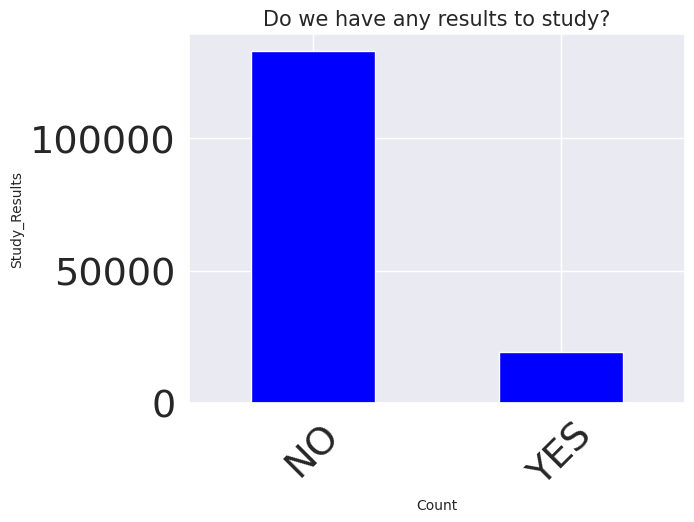

In [ ]:
# Horizontal bar of our target variable
import matplotlib.pyplot as plt

combined_df['Study_Results'].value_counts().plot(kind='bar', color='Blue')
plt.xlabel('Count', fontsize= 10)
plt.ylabel('Study_Results', fontsize= 10)
plt.xticks(rotation = 45)
plt.title('Do we have any results to study?', fontsize = 15);

**Observation**

* Only a small number of the clinical trials have the final study results.

In [ ]:
#find unique values and their counts
unique_values = combined_df['Study_Results'].value_counts()

# Print unique values and their counts
for value, count in unique_values.items():
    print(f'Value: {value}, Count: {count}')

Value: NO, Count: 132926
Value: YES, Count: 19232


**Observation**

* The number of the clinical trials with study results are 19,232 while those without results  are 132,926.

<Axes: >

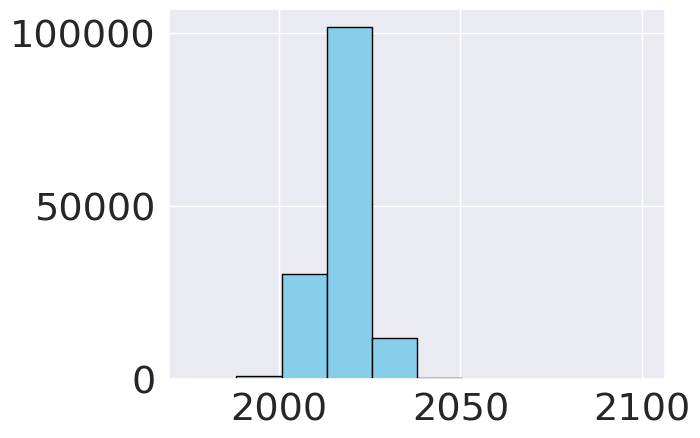

In [ ]:
# Target completion dates for the studies

combined_df['Completion_Date'].dt.year.hist( bins=10, color='skyblue', edgecolor='black')



**Observation**

* The studies were completed between 2000 and 2040.

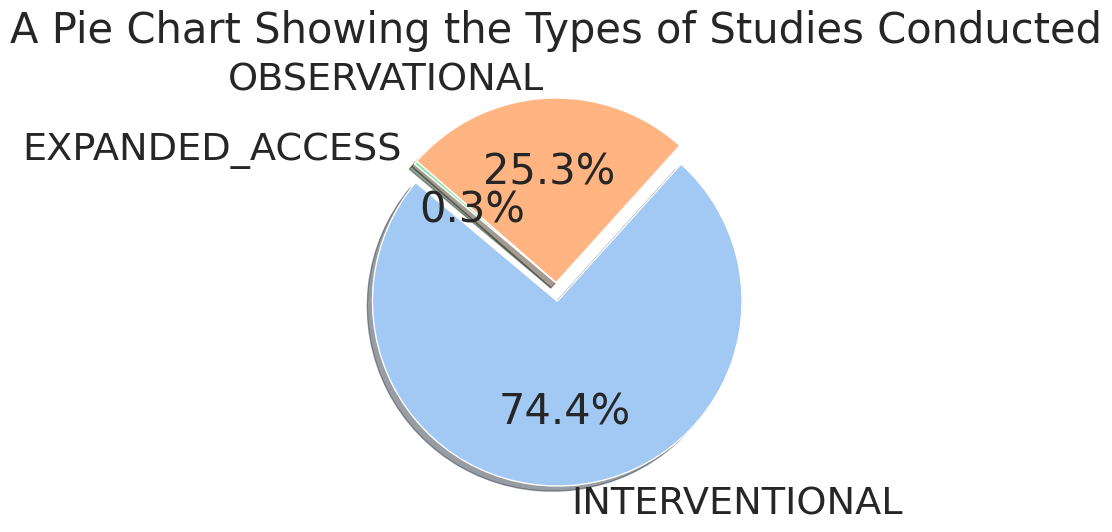

In [ ]:
#Pie chart showing the types of studies

import seaborn as sns
import matplotlib.pyplot as plt

# The data
labels = ['INTERVENTIONAL', 'OBSERVATIONAL', 'EXPANDED_ACCESS']
sizes = [120468, 40896, 499]

# Creating a pie chart using Seaborn
plt.figure(figsize=(8, 6))

sns.set_palette("pastel")  # Set color palette

Explode=[0.1,0,0] # Emphasize on a particular part

plt.pie(sizes, labels=labels, explode=Explode, autopct='%1.1f%%', startangle=140, shadow=True)

plt.title('A Pie Chart Showing the Types of Studies Conducted')
plt.show()


**Observation**

 * 25.3% of the studies conducted were observational; in this; case the researchers observed the effect of a risk factor, diagnostic test, treatment or other intervention without trying to change who was or isn't exposed to it.


*   74.4% of the studies were interventional; the research where potential drugs or procedures were done on the subjects.  

*   Expanded access contributes 0.3% of the studies; where the subjects with life-threatening conditions were given access to the investigational product outside the clinical trials





In [ ]:
#find unique values in the various clinical trial phases and their counts

unique_valu = combined_df['Phases'].value_counts()
unique_valu

Missing          74162
PHASE2           29855
PHASE1           16964
PHASE3           12195
PHASE1|PHASE2     8167
PHASE4            6897
PHASE2|PHASE3     2138
EARLY_PHASE1      1780
Name: Phases, dtype: int64

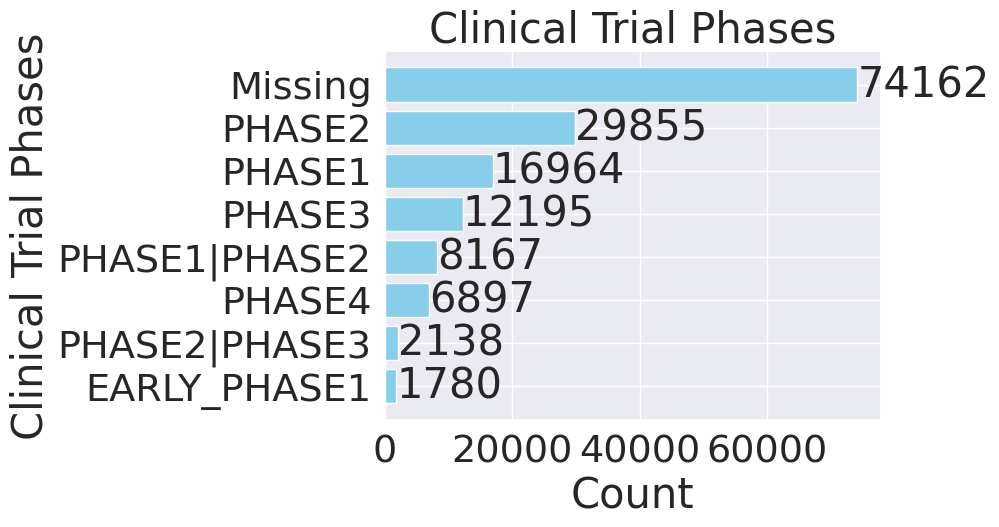

In [ ]:
# A histogram showing the distribution of subjects in the various trial phases
import matplotlib.pyplot as plt

value_counts = combined_df['Phases'].value_counts()
sorted_value_counts = value_counts.sort_values(ascending=True)  # Sort in ascending order

# Create a horizontal bar plot
plt.barh(sorted_value_counts.index, sorted_value_counts.values, color='skyblue')

# Annotate each bar with values (outside the bar)
for index, value in enumerate(sorted_value_counts.values):
    plt.text(value, index, str(value), ha='left', va='center')  # Place labels outside the bar on the right

plt.xlabel('Count')
plt.ylabel('Clinical Trial Phases')
plt.title('Clinical Trial Phases')
plt.xticks(rotation='horizontal')
plt.show()


* Most trials(29,855) are in the Phase 2 where the researchers aim to find out if the new treatment works well enough to be tested in a larger phase 3 trial
* 16,964 trial studies are in Phase 1 where the aim is to determine the optimal dosage and method of administration.
* 2,138 studies are in Phase 2|Phase 3, which provides a bridge between the initial efficacy and safety testing.
* 12,195 studies are in Phase 3, a stage that is pivotal in determining  whether a new drug or treatment will be made available to the public.
* Only 1,780 studies are in Phase 1 where the primary objective is to assess the safety and dosage tolerance of the intervention.
* The number of studies with missing information on clinical phases are 74,162.


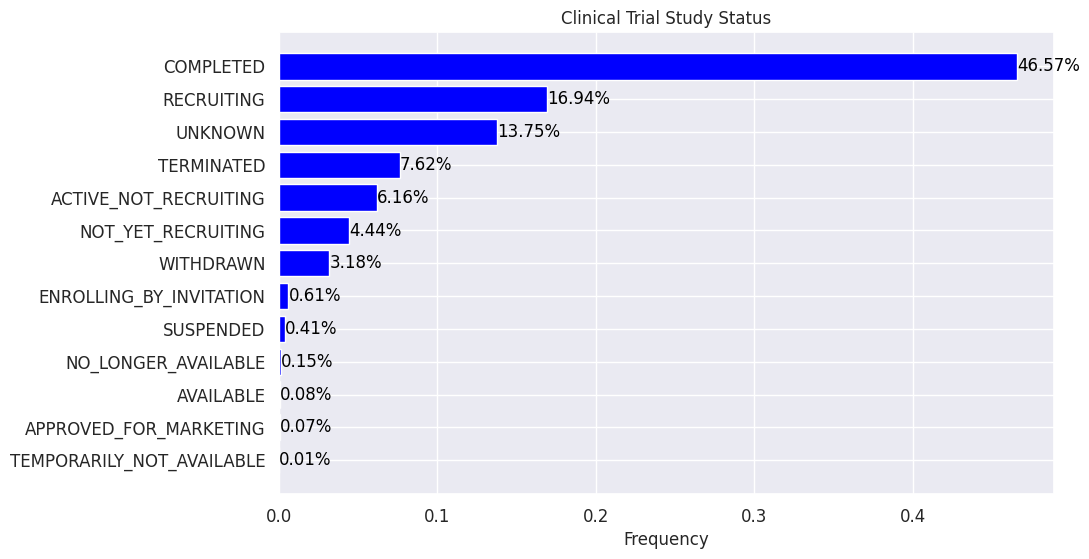

In [ ]:

data = combined_df['Study_Status'].value_counts(normalize=True).sort_values(ascending=True)

# Define the font size for labels
label_fontsize = 12

# Create a horizontal bar plot using Matplotlib
plt.figure(figsize=(10, 6))
bars = plt.barh(data.index, data.values, color='blue')

# Annotate each bar with percentages (outside the bar) with custom font size
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2%}', ha='left', va='center', color='black', fontsize=label_fontsize)

plt.xlabel('Frequency', fontsize=label_fontsize)
plt.title('Clinical Trial Study Status', fontsize=label_fontsize)
plt.xticks(rotation='horizontal', fontsize=label_fontsize)

# Edit the font size of y-axis labels
plt.yticks(fontsize=label_fontsize)

plt.show()


**Observation**

* 46.57% of the trials were completed according to the protocol.
* 16.94% of the clinical trials are actively recruiting participants who meet the study criteria.
* Another 13.75% of the clinical trials have their status as unknown and this can happen for various reasons, such as data reporting delays or lack of available information.
* 7.62% of the clinical trial studies were terminated before its planned completion, and this can happen due to safety concerns, lack of efficacy, or other reasons.
* 6.16% of the trials are active but not recruiting; the trials are ongoing, but new participants are not being recruited or enrolled. Current participants continue to be monitored and treated.
* 4.44% of the studies are yet to recruit participants.
* 3.18% of the clinicals were withdrawn from the study; the trials have been stopped before planned enrollment begun.


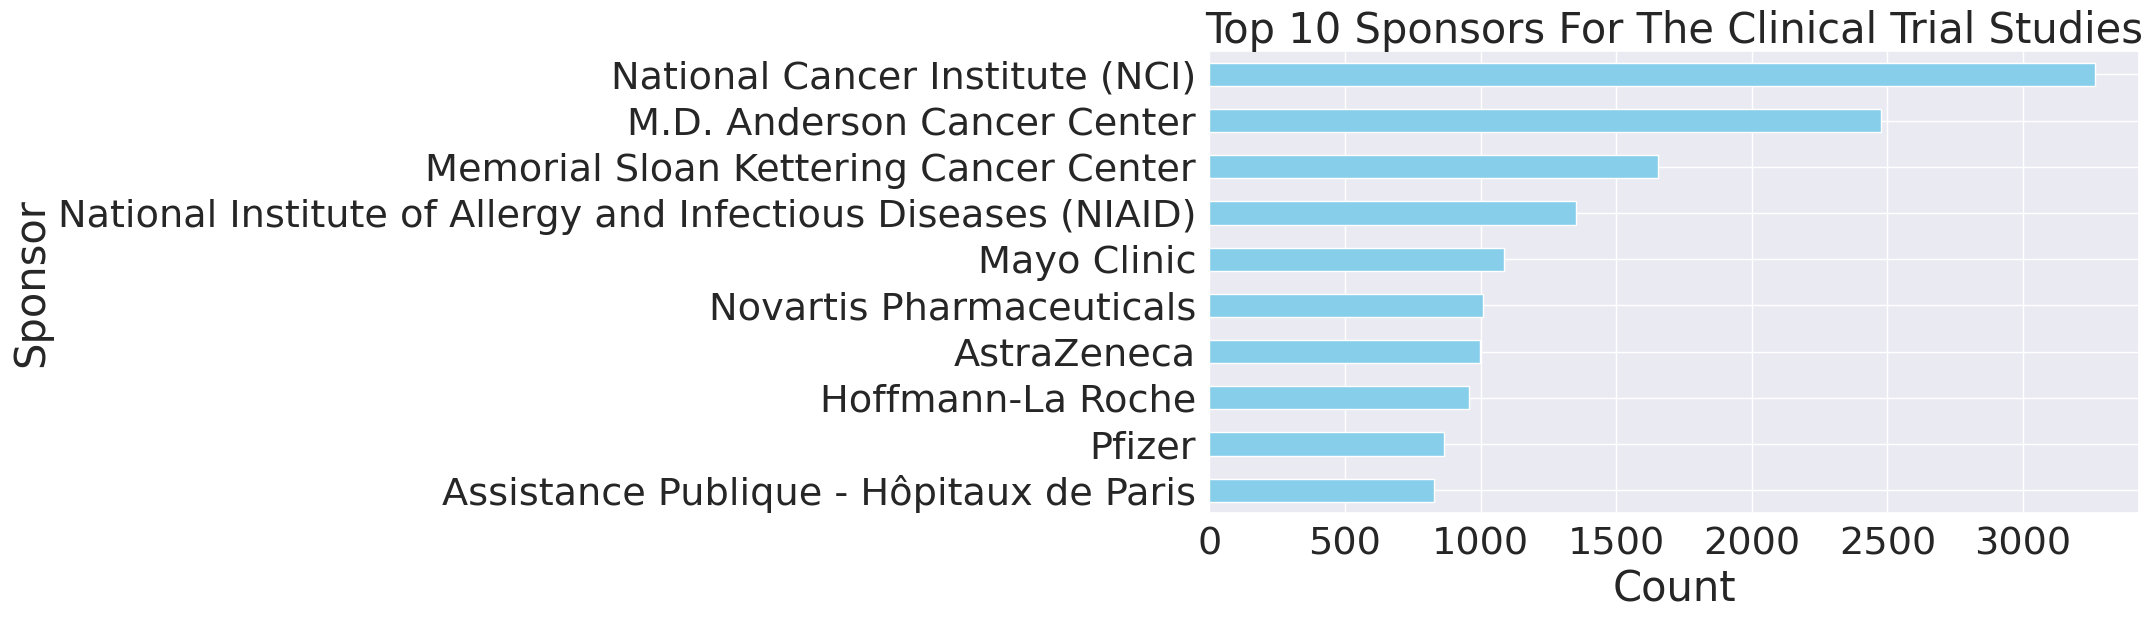

In [ ]:
# A bar plot displaying the various sponsors of the clinical trial studies
top_10_sponsors = combined_df['Sponsor'].value_counts().head(10).sort_values(ascending=True)

# Create a horizontal bar chart for the top 10 sponsors
plt.figure(figsize=(12, 6))
top_10_sponsors.plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.ylabel('Sponsor')
plt.title('Top 10 Sponsors For The Clinical Trial Studies')
plt.xticks(rotation='horizontal')
plt.show()


**Observation**

* The top 5 sponsors of these clinical trial studies are based in the United States of America: they are government agencies and hospita/healthcare systems.
* The pharmaceutical companies(Novartis-Switzerland, Astrazeneca-U.K, Hoffman-La-Roche-Switzerland, and Pfizer-U.S.A) come in closely.


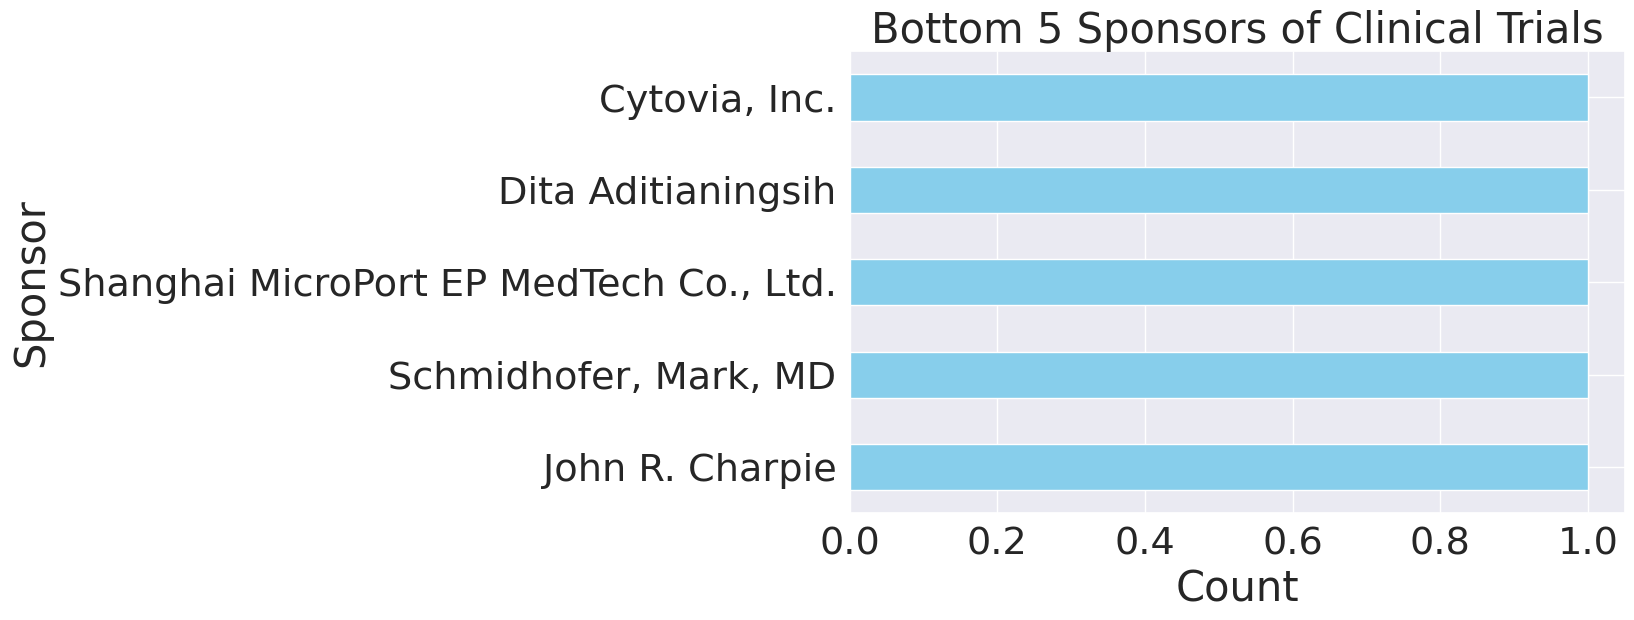

In [ ]:

Bottom_5_sponsors = combined_df['Sponsor'].value_counts().tail(5)

# Create a horizontal bar chart for the top 10 sponsors
plt.figure(figsize=(10, 6))
Bottom_5_sponsors.plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.ylabel('Sponsor')
plt.title('Bottom 5 Sponsors of Clinical Trials')
plt.xticks(rotation='horizontal')
plt.show()

**Observation**

* Some university hospitals, private research universities, medical doctors, and biopharmaceuticals comprise the last 5 sponsors in the clinical trial studies.

In [ ]:
# Top most studied conditions
import pandas as pd
import plotly.express as px

# Group by 'Conditions' and count the occurrences, then sort and select the top 10
top10 = combined_df['Conditions'].value_counts().nlargest(10)

# Create a DataFrame with 'Conditions' and 'Total Trials' columns
top10_df = pd.DataFrame({'Conditions': top10.index, 'Total Trials': top10.values})

# Create the bar chart
fig = px.bar(top10_df,
             title='<b>The 10 Most Studied Conditions</b>',
             x='Total Trials',
             y='Conditions',
             color='Total Trials',
             color_continuous_scale=px.colors.qualitative.Pastel,
             orientation='h',
             height=500,
             width=800)

fig.update_layout(title_x=0.5, title_y=0.9, font=dict(size=14))
fig.update_layout(showlegend=False)

fig.show()


**Observation**

* Six of the top 10 conditions in trial are on cancer. The studied cancer types are that of the breast, prostate, colorectal, lungs, and bones.
* The other 4 diseases are HIV, Covid-19, Heart Failure, and Coronary Artery Disease.

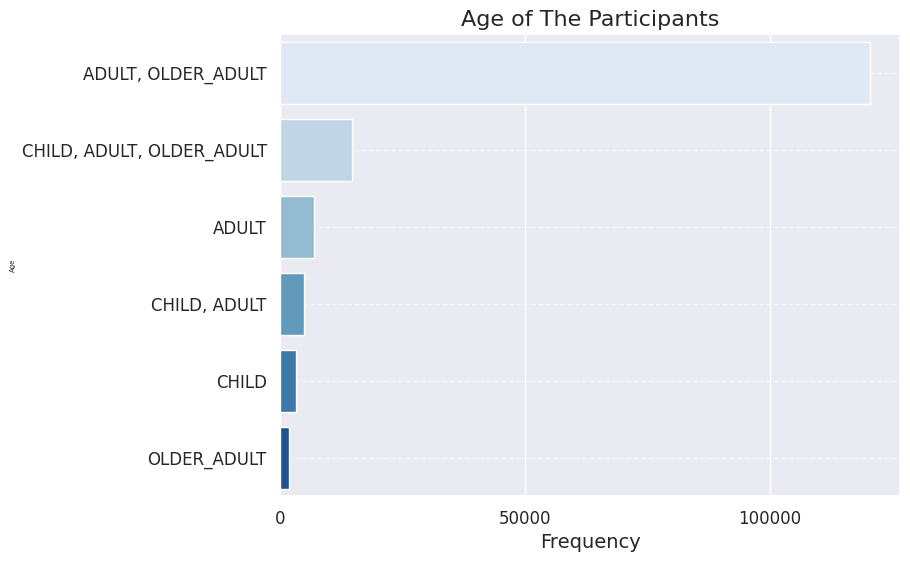

In [ ]:

# Age of the study participants

# Set a custom color palette for the plot
custom_palette = sns.color_palette("Blues", n_colors=len(combined_df['Age'].unique()))

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=combined_df['Age'].value_counts().values,
                y=combined_df['Age'].value_counts().index,
                palette=custom_palette)

plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Age', fontsize=5)
plt.title('Age of The Participants', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()


**Observation**

* Most of participants are of the category "Adults and Older Adults". "Adults" are individuals between the ages of 18 and 64 years old and the "Older adults" refer to individuals who are usually 65 years old or above.
* Clinical trials include older adults to understand how treatments affect this age group, especially since the prevalence of many diseases, including cancer and chronic conditions, increases with age.

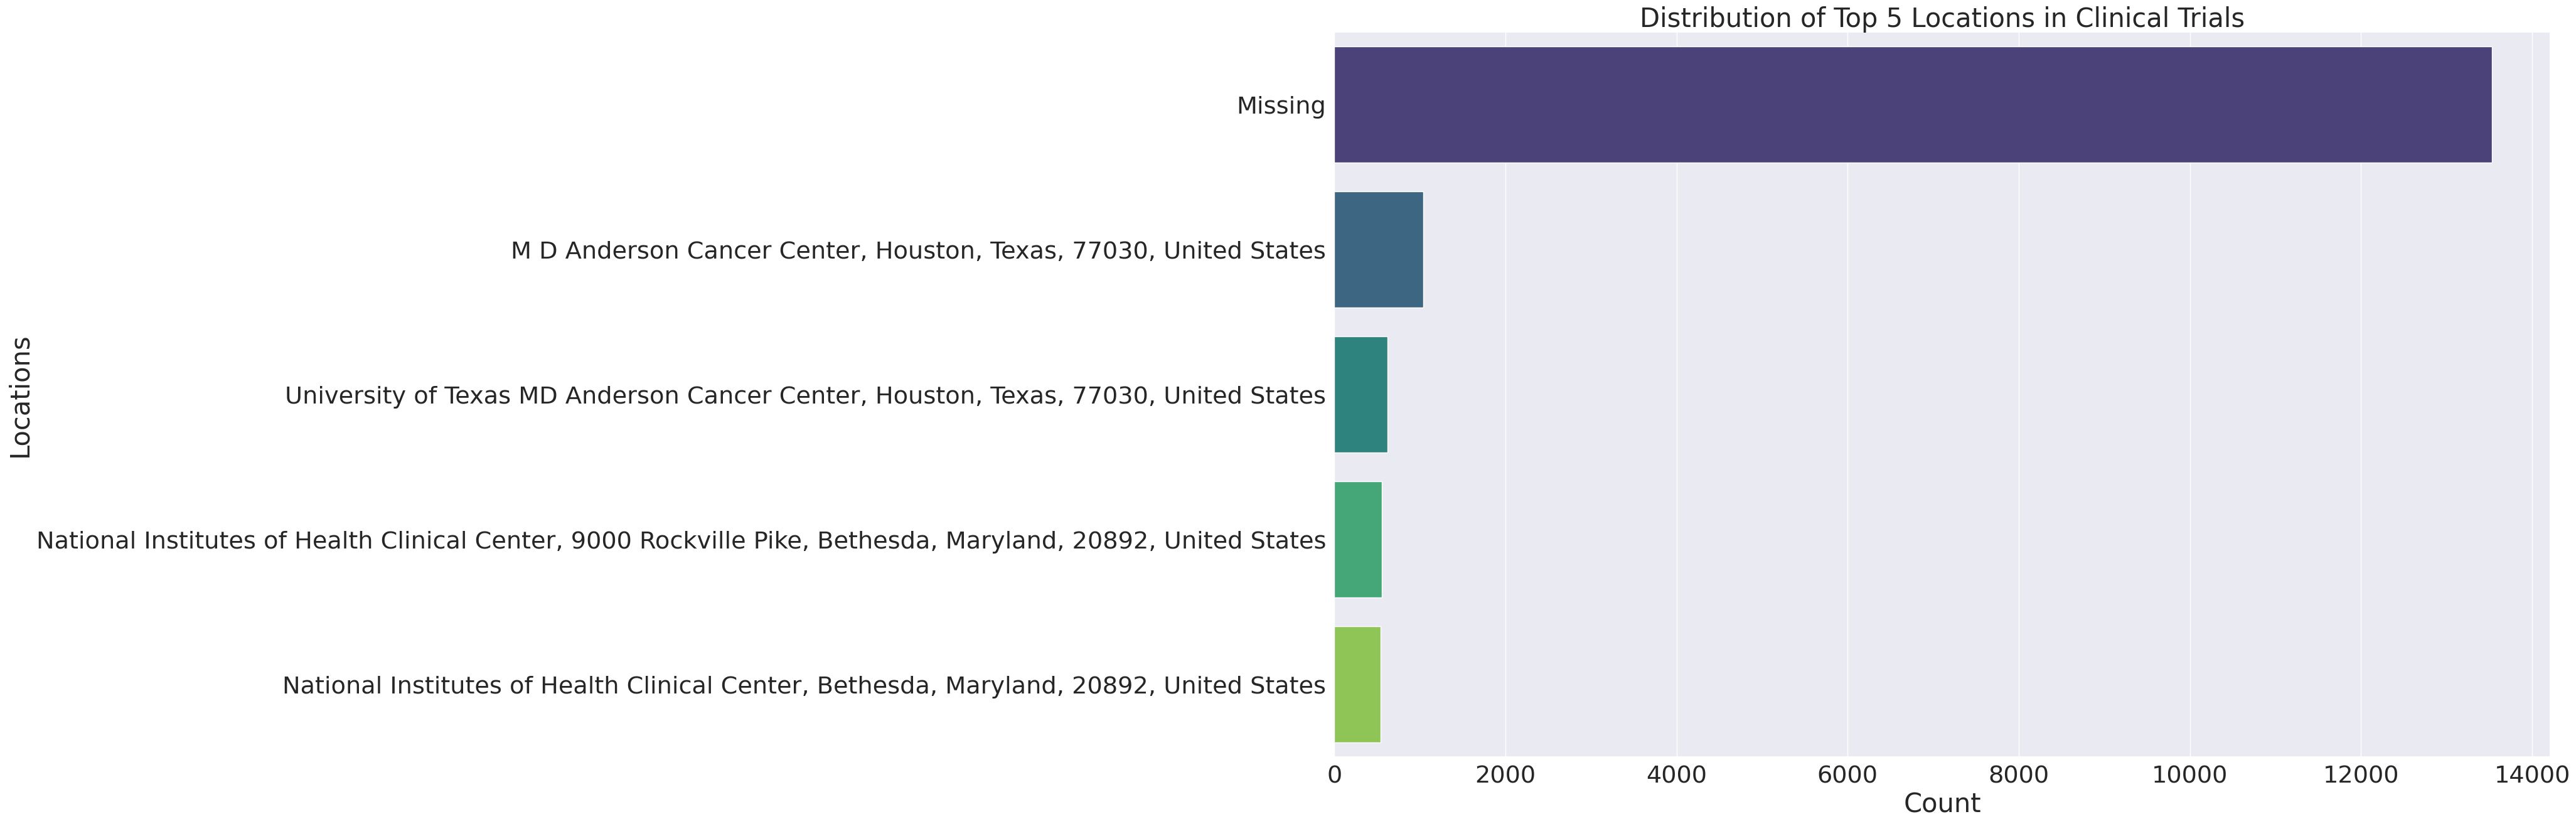

In [ ]:

location_column = 'Locations'

# Get the top 5 locations by frequency
top_locations = combined_df[location_column].value_counts().head(5).index

# Filter the dataset to include only the top 5 locations
filtered_df = combined_df[combined_df[location_column].isin(top_locations)]

# Set the font size for the plot
sns.set(font_scale=2.5)

# Create a count plot for the top 5 locations with location names on the y-axis
plt.figure(figsize=(25, 15))
sns.countplot(data=filtered_df, y=location_column, order=top_locations, palette='viridis')
plt.title(f'Distribution of Top 5 Locations in Clinical Trials')
plt.xlabel('Count')
plt.ylabel(location_column)

plt.show()



**Observation**
*   The data is missing Location data for most of the studies.
*   Most of the studies were conducted at the M D Anderson Cancer Center,Houston, Texas in the US.



### 3.2 Bivariate Analysis###

 It will involve the simultaneous analysis of two variables ( independent and dependent variables) to determine the empirical relationship between them.

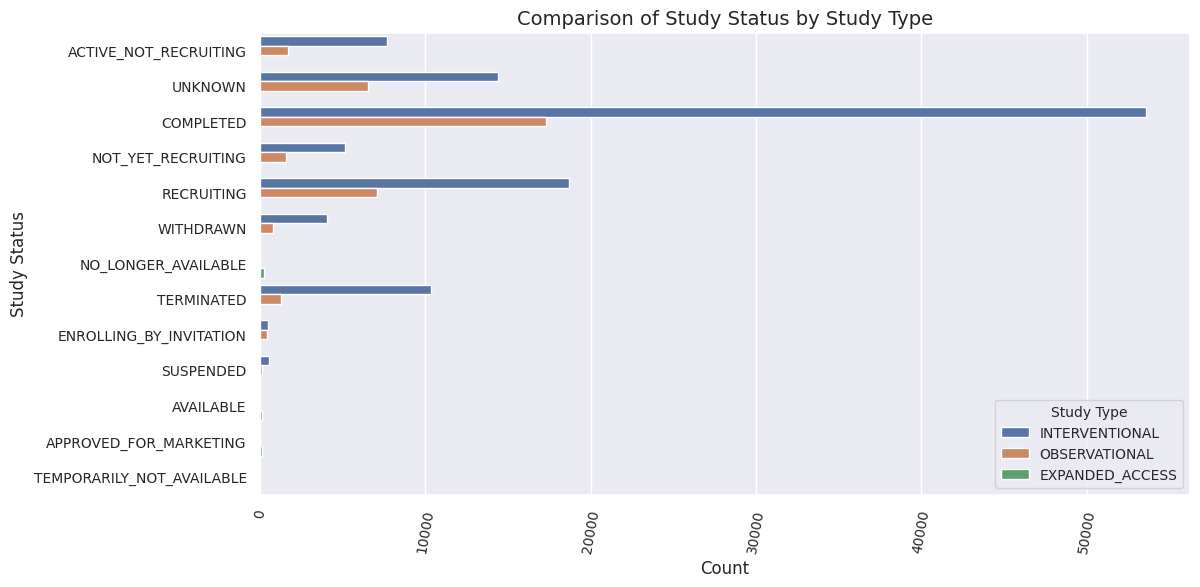

In [ ]:
# A comparison of the study study by the type of study

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=combined_df, y='Study_Status', hue='Study_Type')

plt.title('Comparison of Study Status by Study Type', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Study Status', fontsize=12)
plt.xticks(rotation=80, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Study Type', title_fontsize=10, fontsize=10,loc='lower right')
plt.show()




**Observations**

* Most of the clinical trial studies are interventional in nature followed by the observational ones.
* Most of the completed and currently recruiting clinical trials are interventional.
* The **completed interventional trials** confirm the effectiveness and safety of specific interventions, guiding medical practice, while **completed observational trials** offer valuable insights into real-world health patterns, influencing public health strategies and suggesting areas for future investigation.


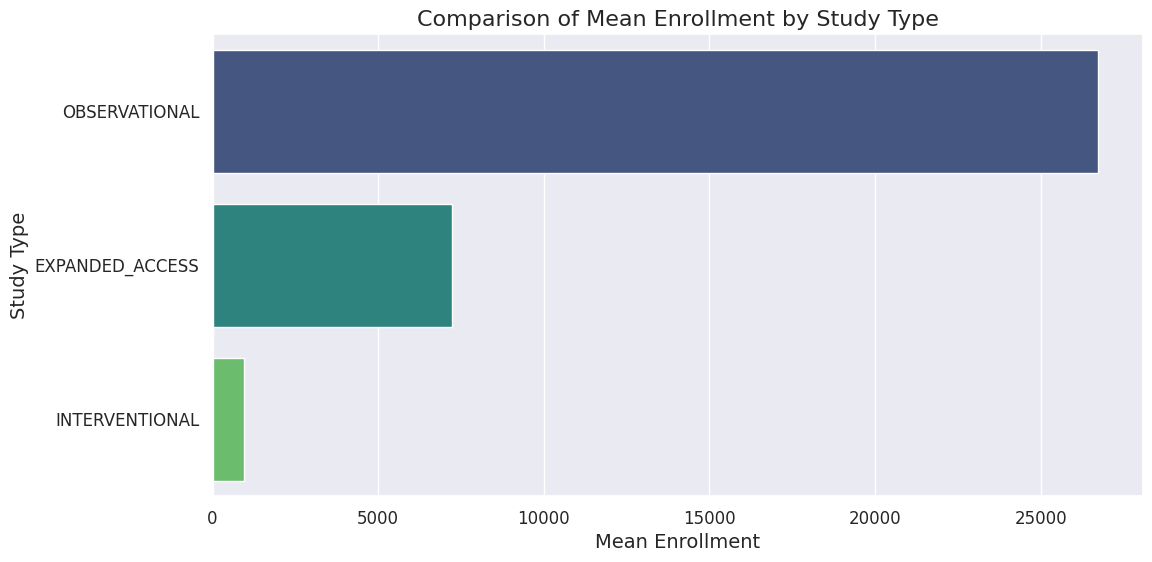

In [ ]:

# Calculate the mean enrollment by study type
mean_enrollment_by_study_type = combined_df.groupby('Study_Type')['Enrollment'].mean().reset_index()

# Sort the data in descending order by mean enrollment
mean_enrollment_by_study_type = mean_enrollment_by_study_type.sort_values('Enrollment', ascending=False)

plt.figure(figsize=(12, 6))

# Create a barplot with a custom color palette
sns.barplot(data=mean_enrollment_by_study_type, x='Enrollment', y='Study_Type', palette='viridis')

plt.title('Comparison of Mean Enrollment by Study Type', fontsize=16)
plt.xlabel('Mean Enrollment', fontsize=14)
plt.ylabel('Study Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


**Observation**




*   The number of participants enrolled in the Observational studies is higher than Expanded Access and Interventional methods of study.
*   Interventional studies enrolled less particpants.






In [ ]:
combined_df.columns

Index(['NCT_Number', 'Study_Title', 'Study_URL', 'Acronym', 'Study_Status',
       'Brief_Summary', 'Study_Results', 'Conditions', 'Interventions',
       'Primary_Outcome_Measures', 'Secondary_Outcome_Measures',
       'Other_Outcome_Measures', 'Sponsor', 'Collaborators', 'Sex', 'Age',
       'Phases', 'Enrollment', 'Funder_Type', 'Study_Type', 'Study_Design',
       'Other_IDs', 'Start_Date', 'Primary_Completion_Date', 'Completion_Date',
       'First_Posted', 'Results_First_Posted', 'Last_Update_Posted',
       'Locations', 'Study_Documents'],
      dtype='object')

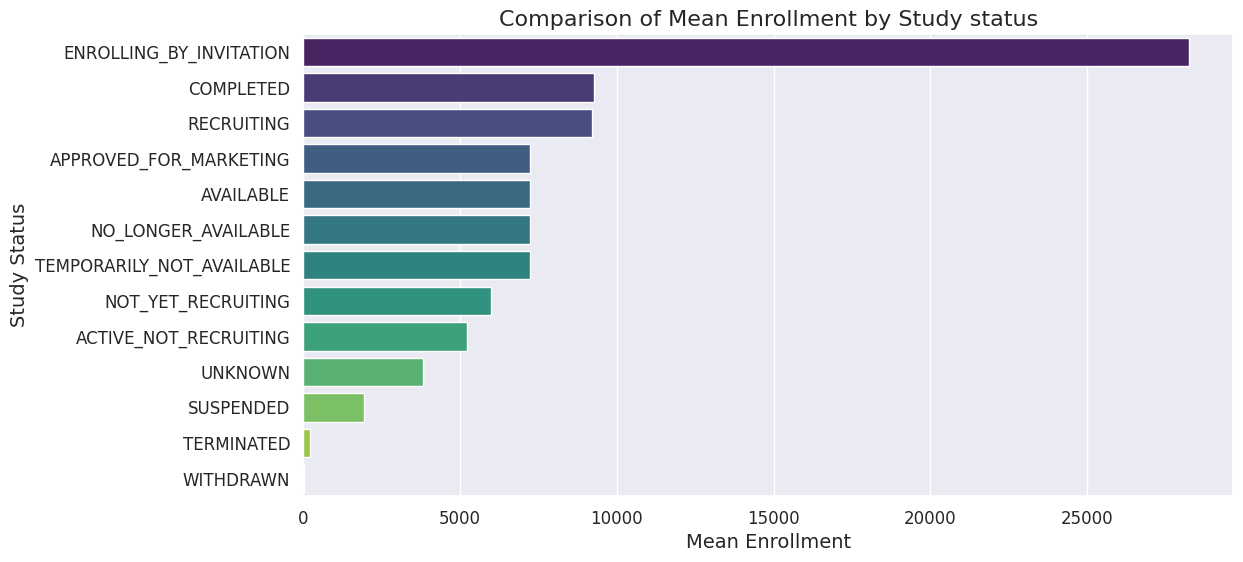

In [ ]:

# Calculate the mean enrollment by study type
mean_enrollment_by_study_status = combined_df.groupby('Study_Status')['Enrollment'].mean().reset_index()

# Sort the data in descending order by mean enrollment
mean_enrollment_by_study_status = mean_enrollment_by_study_status.sort_values('Enrollment', ascending=False)

plt.figure(figsize=(12, 6))

# Create a barplot with a custom color palette
sns.barplot(data=mean_enrollment_by_study_status, x='Enrollment', y='Study_Status', palette='viridis')

plt.title('Comparison of Mean Enrollment by Study status', fontsize=16)
plt.xlabel('Mean Enrollment', fontsize=14)
plt.ylabel('Study Status', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Observation**


*   Terminated and withdrawn  studies recorded the lowest number of enrollment.






##**4. Implementing The Solution**

Modeling in this phase will include selecting a machine learning technique;designing the test; building the model and assessing model that will predict whether a clinical trial will be completed or terminated.

### 4.1 Data Pre-Processing

In [ ]:
# Import the required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd



In [ ]:
# Select the Y variable; in this case it is the study_status

combined_df.Study_Status.value_counts()

COMPLETED                    70866
RECRUITING                   25776
UNKNOWN                      20926
TERMINATED                   11594
ACTIVE_NOT_RECRUITING         9380
NOT_YET_RECRUITING            6757
WITHDRAWN                     4845
ENROLLING_BY_INVITATION        923
SUSPENDED                      628
NO_LONGER_AVAILABLE            232
AVAILABLE                      120
APPROVED_FOR_MARKETING          99
TEMPORARILY_NOT_AVAILABLE       12
Name: Study_Status, dtype: int64

In [ ]:
#filter the study status to get only the completed and Terminated clinical trial studies

# STATUS is the new dataframe with COMPLETED and TERMINATED studies

import re
status= combined_df[combined_df['Study_Status'].str.contains(r'^(COMPLETED|TERMINATED)', case=False, na=False, regex=True)]

#previewing
status.head(5)



<ipython-input-98-c676e3d3a2db>:6: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



,NCT_Number,Study_Title,Study_URL,Acronym,Study_Status,Brief_Summary,Study_Results,Conditions,Interventions,Primary_Outcome_Measures,...,Study_Design,Other_IDs,Start_Date,Primary_Completion_Date,Completion_Date,First_Posted,Results_First_Posted,Last_Update_Posted,Locations,Study_Documents
2,NCT04333225,Hydroxychloroquine in the Prevention of COVID-...,https://clinicaltrials.gov/study/NCT04333225,Missing,COMPLETED,In order to assess the efficacy of hydroxychlo...,YES,COVID-19,DRUG: Hydroxychloroquine,Number of Participants Infected With COVID-19 ...,...,Allocation: NON_RANDOMIZED|Intervention Model:...,020-132,2020-04-03,2020-06-30,2020-06-30,2020-04-03,2021-08-02,2021-08-20,"Baylor University Medical Center, Dallas, Texa...",Study Protocol|Statistical Analysis Plan
3,NCT04996225,Effect of Aerobics and Balancing Exercises on ...,https://clinicaltrials.gov/study/NCT04996225,Missing,COMPLETED,The recently emerged coronavirus named Severe ...,NO,Corona Virus Infection,"OTHER: Aerobics exercises, Balance exercises","SPSS for Windows, version 22 (SPSS Inc., Chica...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,"A,B E COVID 19",2021-08-01,2022-10-25,2023-02-10,2021-08-09,NaT,2023-02-22,"Ahmed.Assem, Sohag, 82951, Egypt",Missing
5,NCT04419025,Efficacy of N-Acetylcysteine (NAC) in Preventi...,https://clinicaltrials.gov/study/NCT04419025,Missing,COMPLETED,The purpose of this study is to assess the eff...,NO,COVID|Sars-CoV2|SARS-Associated Coronavirus as...,DRUG: N-acetylcysteine,"Decrease in Respiratory Rate, Decrease in dysp...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,CHA-IRB-1139/05/20,2020-09-23,2021-05-14,2021-05-14,2020-06-05,NaT,2021-05-28,"CHA Cambridge Hospital, Cambridge, Massachuset...",Missing
12,NCT04458519,Efficacy of Intranasal Probiotic Treatment to ...,https://clinicaltrials.gov/study/NCT04458519,Missing,COMPLETED,"Randomised, single-blinded trial. Patients wit...",NO,COVID-19 Infection,OTHER: Probiorinse|OTHER: Saline solution,"Change in severity of COVID-19 infection, Chan...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,PROBCO|249512,2020-07-16,2021-05-27,2021-05-27,2020-07-07,NaT,2021-06-01,Centre Hospitalier de l'Université de Montréal...,Missing
13,NCT04715919,Long Term Outcomes of Coronavirus Disease-19 (...,https://clinicaltrials.gov/study/NCT04715919,Missing,COMPLETED,The investigators hypothese that lung involvem...,NO,Covid19,DIAGNOSTIC_TEST: Chest Computed Tomography|DIA...,"Structural Change in Lung, Chest Computed Tomo...",...,Observational Model: |Time Perspective: p,195/ADF14,2021-01-15,2021-06-01,2021-06-01,2021-01-20,NaT,2021-09-14,"1University of Health Sciences Turkey, Dr Suat...",Missing


In [ ]:
status.Study_Status.value_counts()

COMPLETED     70866
TERMINATED    11594
Name: Study_Status, dtype: int64

**Observation**

* The dataset above has only the studies that were completed or terminated.

In [ ]:
#checking the shape
status.shape

(82460, 30)

**Observation**

* The working dataset now has 82,460 rows and 30 columns

In [ ]:
#let's encode the categorical features i.e convert them to numerical values
from sklearn.preprocessing import LabelEncoder

# Function to label encode the categorical variables
def encode_categorical_features(dataframe):
    encoded_dataframe = dataframe.copy()  # Create a copy of the original DataFrame

    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            encoder = LabelEncoder()
            encoded_dataframe[column] = encoder.fit_transform(dataframe[column])

    return encoded_dataframe

# Example usage:
encoded_status = encode_categorical_features(status)


In [ ]:
# Print the top 5 encoded rows

encoded_status.head(5)

,NCT_Number,Study_Title,Study_URL,Acronym,Study_Status,Brief_Summary,Study_Results,Conditions,Interventions,Primary_Outcome_Measures,...,Study_Design,Other_IDs,Start_Date,Primary_Completion_Date,Completion_Date,First_Posted,Results_First_Posted,Last_Update_Posted,Locations,Study_Documents
2,72220,38424,72220,10737,0,13075,1,6295,30008,33101,...,140,1123,2020-04-03,2020-06-30,2020-06-30,2020-04-03,2021-08-02,2021-08-20,4073,165
3,78650,26889,78650,10737,0,55823,0,11322,49082,56152,...,530,26264,2021-08-01,2022-10-25,2023-02-10,2021-08-09,NaT,2023-02-22,1299,10
5,73558,29906,73558,10737,0,46157,0,6734,33662,13962,...,530,37757,2020-09-23,2021-05-14,2021-05-14,2020-06-05,NaT,2021-05-28,5904,10
12,74035,29856,74035,10737,0,28602,0,6318,52955,9052,...,475,68389,2020-07-16,2021-05-27,2021-05-27,2020-07-07,NaT,2021-06-01,8352,10
13,76503,44257,76503,10737,0,37281,0,12194,16487,59131,...,849,12318,2021-01-15,2021-06-01,2021-06-01,2021-01-20,NaT,2021-09-14,204,10


**Observation**

* The new dataframe called **encoded_status** contains numerical values. Label Encoding assigns a unique numerical value to each category in a categorical variable, essentially converting the categories into integers.

In [ ]:
# List of columns to drop
columns_to_drop = ['Study_URL', 'Acronym', 'Brief_Summary', 'Primary_Outcome_Measures','Secondary_Outcome_Measures','Other_Outcome_Measures','Other_IDs','Results_First_Posted','Study_Documents']

# Drop the specified columns
encoded_status.drop(columns=columns_to_drop, inplace=True)


In [ ]:
#Drop the dates in datetime format

df = pd.DataFrame(encoded_status)


df.drop(columns=['Start_Date','Primary_Completion_Date','Completion_Date','First_Posted','Last_Update_Posted'], axis=1, inplace=True)

df.shape


(82460, 16)

**Observation**

* The dataframe named df will be used for modelling. It has 16 columns, and 82,460 rows

**Split data into X and y**

In [ ]:
target='Study_Status'

y=df[target]
X=df.drop(target,axis=1)

#Split into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

#scaling using MinMax scaler which  scales features to a specified range, usually [0, 1]

# X-train(fit,transform)----- scales the data, and the result is stored in a DataFrame.
training_scaler = MinMaxScaler().fit(X_train)
training_set = training_scaler.transform(X_train)

#X_TEST(FIT,TRANSFORM)
testing_scaler = MinMaxScaler().fit(X_test)
testing_set = testing_scaler.transform(X_test)


In [ ]:
# Check our X(independent) features

X.head(3)

,NCT_Number,Study_Title,Study_Results,Conditions,Interventions,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder_Type,Study_Type,Study_Design,Locations
2,72220,38424,1,6295,30008,1051,7190,0,1,4,221,5,0,140,4073
3,78650,26889,0,11322,49082,5932,7190,0,1,1,30,5,0,530,1299
5,73558,29906,0,6734,33662,1480,7190,0,1,4,165,5,0,530,5904


**Observation**

* Has 15 columns except for the **Study_Status** column; our dependent variable

In [ ]:
# Check the y features
y.head(6)

2     0
3     0
5     0
12    0
13    0
16    0
Name: Study_Status, dtype: int64

**Observation**

Our binary target variable is the **Study_Status** column; ie y variable

In [ ]:
X_train.shape

(65968, 15)

**Observation**

* 65,968 independent variable equals the 80% (80/20% split) that will be used for training.

In [ ]:
X_test.shape

(16492, 15)

**Observation**

* The 20% that will be used for test are 16,492 independent features


###4.2 Modelling

Will be utilizing XGBoost, a powerful gradient boosting algorithm, for the modeling task.

XGBoost is known for its speed, efficiency, and effectiveness in handling both classification(in our case) and regression problems. It employs boosting techniques to create a robust ensemble of decision trees, iteratively correcting errors and enhancing accuracy. It is capable of handling large datasets while maintaining model performances.

XGBoost can handle imbalanced data, but it will require additional tuning to effectively address the class imbalance.

>

In [ ]:
#Develop  a predictive model using XGboost; an optimized gradient boosting algorithm

from sklearn.metrics import classification_report, confusion_matrix

from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

Accuracy: 88.42%
[[13820   342]
 [ 1568   762]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     14162
           1       0.69      0.33      0.44      2330

    accuracy                           0.88     16492
   macro avg       0.79      0.65      0.69     16492
weighted avg       0.87      0.88      0.87     16492




**Observation**
*   Our model correctly predicts that 13915 studies were completed and  757 studies were terminated.
*   On the other hand,it makes 317 predictions about studies being completed while in real sense they were terminated. It wrongly predicts that 1501 studies were terminated yet they were completed.


*   Going by the F1 Score, the model is 94% right about the 0 class which represents 'COMPLETED' and 45% right about class 1 which represents 'TERMINATED'.
*   It gives us an overall accuracy of 89%.





**Tune the XGboost model**

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Our features in X and labels in y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use XGBoost DMatrix, an interface that is optimized for both memory efficiency and training speed.
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set hyperparameters
params = {
    'objective': 'binary:logistic',  # for our binary classification problem
    'max_depth': 3, #  limits the maximum depth of each decision tree in the ensemble
    'learning_rate': 0.1, #  the model's weights are updated by 10% of their current value during each iteration
    'eval_metric': 'logloss' # quantifies the accuracy of a classifier by penalizing false classifications
}
# Train the model
num_rounds = 100  # Number of boosting rounds (iterations)
xgb_model = xgb.train(params, dtrain, num_rounds, evals=[(dtest, 'eval')])

# Make predictions on the test data
y_pred = xgb_model.predict(dtest)

# Convert probabilities to binary predictions (0 or 1)
predictions = [1 if pred > 0.5 else 0 for pred in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))


[0]	eval-logloss:0.40060
[1]	eval-logloss:0.38820
[2]	eval-logloss:0.37842
[3]	eval-logloss:0.37052
[4]	eval-logloss:0.36389
[5]	eval-logloss:0.35833
[6]	eval-logloss:0.35376
[7]	eval-logloss:0.34983
[8]	eval-logloss:0.34637
[9]	eval-logloss:0.34358
[10]	eval-logloss:0.34103
[11]	eval-logloss:0.33894
[12]	eval-logloss:0.33721
[13]	eval-logloss:0.33562
[14]	eval-logloss:0.33418
[15]	eval-logloss:0.33297
[16]	eval-logloss:0.33186
[17]	eval-logloss:0.33084
[18]	eval-logloss:0.33003
[19]	eval-logloss:0.32932
[20]	eval-logloss:0.32868
[21]	eval-logloss:0.32813
[22]	eval-logloss:0.32757
[23]	eval-logloss:0.32693
[24]	eval-logloss:0.32621
[25]	eval-logloss:0.32581
[26]	eval-logloss:0.32546
[27]	eval-logloss:0.32497
[28]	eval-logloss:0.32453
[29]	eval-logloss:0.32416
[30]	eval-logloss:0.32386
[31]	eval-logloss:0.32346
[32]	eval-logloss:0.32324
[33]	eval-logloss:0.32301
[34]	eval-logloss:0.32270
[35]	eval-logloss:0.32241
[36]	eval-logloss:0.32220
[37]	eval-logloss:0.32199
[38]	eval-logloss:0.32

## **5. Challenging the Solution**

Accuracy: 88.39%
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     14152
           1       0.67      0.37      0.47      2340

    accuracy                           0.88     16492
   macro avg       0.78      0.67      0.70     16492
weighted avg       0.87      0.88      0.87     16492



<Axes: >

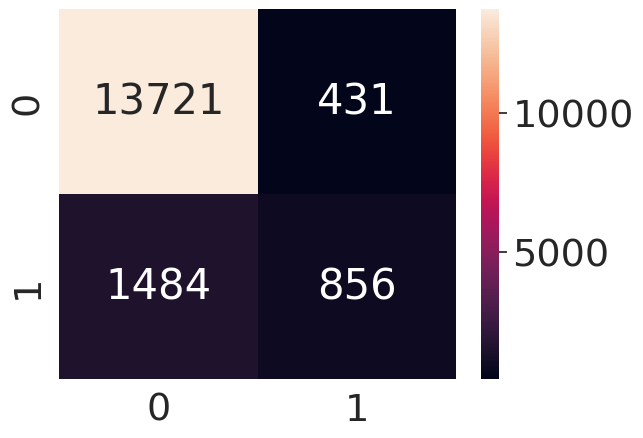

In [ ]:
# Use a different ML technique and compare with XGboost; in this case we use Random Forest


from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform oversampling on the training data using RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier on the oversampled data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')




**Observation**


*   Random forest model gives us an overal accuracy score of 88.39%. It correctly predicts that 13721 studies were completed while 856 were terminated.
*  It also makes wrong prections that 431 studies were completed yet they were terminated and 1484 studies were terminated yet they were completed.



##**6.Conclusion**



*   There are various research approaches that are employed in clinical trials. The most commonly used according to the analysis is the interventional type of study.


*  The data reveals a predominant focus on adult and older adult participants, with limited representation of children and a gap in older adult involvement in clinical studies. Ensuring a more inclusive age distribution in research is crucial for comprehensive medical advancements.



*  In our exploration, we identified a select group of diseases that have garnered the most attention in clinical studies. These include Cancer related diseases,HIV/AIDS,Heart disease and COVID-19. This knowledge helps direct healthcare resources and research efforts to areas where they are most needed.


*   Our analysis highlighted the key sponsors who are driving clinical research.They include, National Cancer Institute, M.D Anderson Cancer Center,Memorial Sloan Kettering Cancer Center among others. Understanding these major stakeholders is crucial for assessing the funding and resource allocation in medical research.
*   Investigating the statuses of registered clinical studies, gave insights into the progress and success rates of ongoing research endeavors, which allows us to identify areas of potential improvement.



*   From the analysis, United States has emerged as a prominent hub for clinical studies.This geographic pattern reflects the presence of well-established research institutions, robust healthcare infrastructure, and patient populations conducive to clinical trials. While these hubs drive innovation, it also underscores the need for equitable distribution of research opportunities to ensure that medical advancements benefit a broader and more diverse population.
*   The data shows that many studies are done, which is good for progress. Some are still looking for participants, showing ongoing research. But there are also some we don't know much about, and some that got stopped. This tells us that clinical research can be uncertain, and it's important to find out why some studies don't go as planned to improve future trials.



* The predictive model we developed to forecast whether a clinical study is likely to be completed or terminated offers valuable insights into the factors influencing the outcome of these studies. By successfully utilizing this model, we gain a better understanding of the determinants that contribute to the successful completion of trials or their premature termination. This knowledge can guide stakeholders in making informed decisions and optimizing resources to increase the chances of successful clinical studies, ultimately advancing medical research and healthcare.










## 7.**Recomendation**





*   Given the prominence of cancer-related diseases, HIV/AIDS, heart disease, and COVID-19 in clinical studies, it is crucial to continue investing in research and allocating resources to these areas. Additionally, ensuring accessible and affordable healthcare for these conditions is essential for better health outcomes.
*   There is need for more collaboration with major sponsors in the clinical trials for impactful partnerships and funding hence successful clinical trials.


*   For areas with ongoing research, maintaining a system that monitors the progress and success rates of clinical studies is essential. Periodic reviews and quality assessments can help identify and address any issues, ensuring more efficient and successful trials.
*   While established research hubs are important, it's vital to promote a more balanced distribution of clinical studies to benefit a broader population. Encouraging research institutions in less prominent regions can help in achieving a more equitable spread of medical advancements.


* For studies with unknown or terminated statuses, there is a need for in-depth analysis to understand the reasons behind these outcomes. This analysis can guide future research efforts, ensuring a more efficient use of resources and better planning.  
*  Harness the power of predictive modelling as a pivotal tool in clinical trials. By integrating predictive modeling into the decision-making process, we can significantly enhance our ability to foresee study outcomes. This not only helps us avoid costly project stalls and untimely terminations but also enables us to allocate funds more effectively, maximizing the impact of our investments.






